In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils import load_data, clean_data, feature_engineer

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from scipy.stats import randint
from sklearn import preprocessing
from sklearn.tree import plot_tree

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
# load data
pickle_raw = load_data(path = 'data/Pickleball - Sheet1.csv')

In [3]:
# clean data
pickle_clean = clean_data(pickle_raw)

In [4]:
# create features
pickle = feature_engineer(pickle_clean)

In [5]:
pickle.head()

1,Day,Park,Court,court_time,game_num,Player_A_1,Player_A_2,Paddle,Player_B_1,Player_B_2,Paddle2,game_length,becca_start,year,becca_win
2,Sunday,Plummer Park,6B,2024-05-09 14:00:00,1,Julianna,Alex,Straight,Becca,Justin,Bisexual,0 days 00:38:00,False,2023,True
3,Sunday,Plummer Park,6B,2024-05-09 14:00:00,2,Julianna,Alex,Straight,Becca,Stig,Bisexual,0 days 00:53:00,False,2023,False
4,Tuesday,Roxbury Tennis Club,2,2024-05-09 18:00:00,1,Julianna,None,Straight,Becca,None,Bisexual,0 days 00:26:00,True,2023,True
5,Tuesday,Roxbury Tennis Club,2,2024-05-09 18:00:00,2,Julianna,None,Straight,Becca,None,Bisexual,0 days 00:10:00,True,2023,True
6,Tuesday,Roxbury Tennis Club,2,2024-05-09 18:00:00,3,Julianna,None,Straight,Becca,None,Bisexual,0 days 00:21:00,True,2023,False


In [6]:
pickle_new = pickle

In [7]:
pickle_new['game_length_mins'] = pickle_new.game_length.dt.total_seconds()/60

In [8]:
pickle_new = pickle_new.drop('game_length', axis = 1)

In [9]:
pickle_new['hour'] = pickle_new.court_time.dt.hour

In [10]:
pickle_new.head()

1,Day,Park,Court,court_time,game_num,Player_A_1,Player_A_2,Paddle,Player_B_1,Player_B_2,Paddle2,becca_start,year,becca_win,game_length_mins,hour
2,Sunday,Plummer Park,6B,2024-05-09 14:00:00,1,Julianna,Alex,Straight,Becca,Justin,Bisexual,False,2023,True,38.0,14
3,Sunday,Plummer Park,6B,2024-05-09 14:00:00,2,Julianna,Alex,Straight,Becca,Stig,Bisexual,False,2023,False,53.0,14
4,Tuesday,Roxbury Tennis Club,2,2024-05-09 18:00:00,1,Julianna,None,Straight,Becca,None,Bisexual,True,2023,True,26.0,18
5,Tuesday,Roxbury Tennis Club,2,2024-05-09 18:00:00,2,Julianna,None,Straight,Becca,None,Bisexual,True,2023,True,10.0,18
6,Tuesday,Roxbury Tennis Club,2,2024-05-09 18:00:00,3,Julianna,None,Straight,Becca,None,Bisexual,True,2023,False,21.0,18


In [11]:
pickle_new = pickle_new[['game_num','Player_A_2','Player_B_2','becca_start','becca_win']]

In [12]:
pickle_new.head()

1,game_num,Player_A_2,Player_B_2,becca_start,becca_win
2,1,Alex,Justin,False,True
3,2,Alex,Stig,False,False
4,1,None,None,True,True
5,2,None,None,True,True
6,3,None,None,True,False


In [13]:
pickle_dummies = pd.get_dummies(pickle_new)

In [14]:
pickle_dummies

,game_num,becca_start,becca_win,Player_A_2_Alex,Player_A_2_None,Player_A_2_Taylor,Player_A_2_Tori,Player_B_2_Alex,Player_B_2_Justin,Player_B_2_None,Player_B_2_Stig,Player_B_2_Taylor,Player_B_2_Tori
2,1,False,True,1,0,0,0,0,1,0,0,0,0
3,2,False,False,1,0,0,0,0,0,0,1,0,0
4,1,True,True,0,1,0,0,0,0,1,0,0,0
5,2,True,True,0,1,0,0,0,0,1,0,0,0
6,3,True,False,0,1,0,0,0,0,1,0,0,0
7,4,False,False,0,1,0,0,0,0,1,0,0,0
8,5,False,True,0,1,0,0,0,0,1,0,0,0
9,1,False,True,0,1,0,0,0,0,0,0,1,0
10,2,True,False,0,0,1,0,0,0,1,0,0,0
11,3,False,True,0,1,0,0,0,0,1,0,0,0


In [15]:
X = pickle_dummies.drop('becca_win', axis=1)
y = pickle_dummies['becca_win']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [16]:
X_train

,game_num,becca_start,Player_A_2_Alex,Player_A_2_None,Player_A_2_Taylor,Player_A_2_Tori,Player_B_2_Alex,Player_B_2_Justin,Player_B_2_None,Player_B_2_Stig,Player_B_2_Taylor,Player_B_2_Tori
24,3,False,0,1,0,0,0,0,1,0,0,0
4,1,True,0,1,0,0,0,0,1,0,0,0
19,2,True,0,1,0,0,0,0,1,0,0,0
11,3,False,0,1,0,0,0,0,1,0,0,0
61,4,False,0,1,0,0,0,0,0,0,1,0
15,3,True,0,1,0,0,0,0,1,0,0,0
3,2,False,1,0,0,0,0,0,0,1,0,0
13,1,False,0,1,0,0,0,0,1,0,0,0
12,4,False,0,0,1,0,0,0,1,0,0,0
51,3,False,0,0,0,1,0,0,0,0,1,0


In [19]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [18,19,20,21,22],  # Number of trees in the forest
    'max_depth': [None, 2, 3, 4, 5],  # Maximum depth of the trees
    'min_samples_split': [4, 5,6,7],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 3]  # Minimum number of samples required at each leaf node
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42, bootstrap=False)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(bootstrap=False, random_state=42),
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [4, 5, 6, 7],
                         'n_estimators': [18, 19, 20, 21, 22]},
             scoring='accuracy')

In [20]:
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)
print(grid_search.best_params_)
best_rf = grid_search.best_estimator_
test_accuracy = best_rf.score(X_test, y_test)
# y_pred = rf.predict(X_test)
print("Accuracy:", test_accuracy)

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 19}
Accuracy: 0.5555555555555556


In [21]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

NameError: name 'y_pred' is not defined

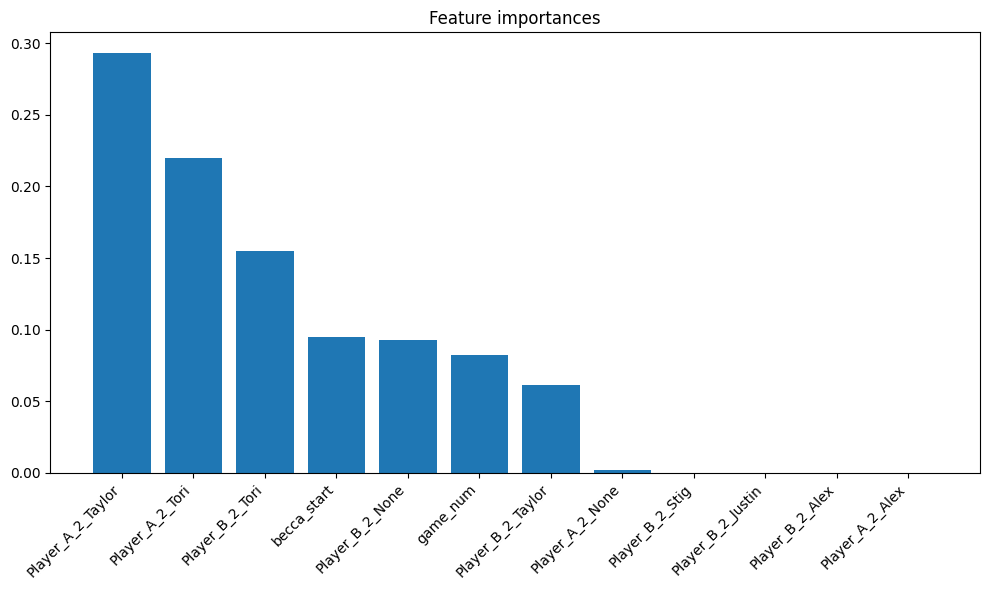

In [22]:
# Visualize variable importance

# Get feature importances
importances = best_rf.feature_importances_
features = X.columns.tolist()

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize = (10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align = "center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation = 45, ha = "right")
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


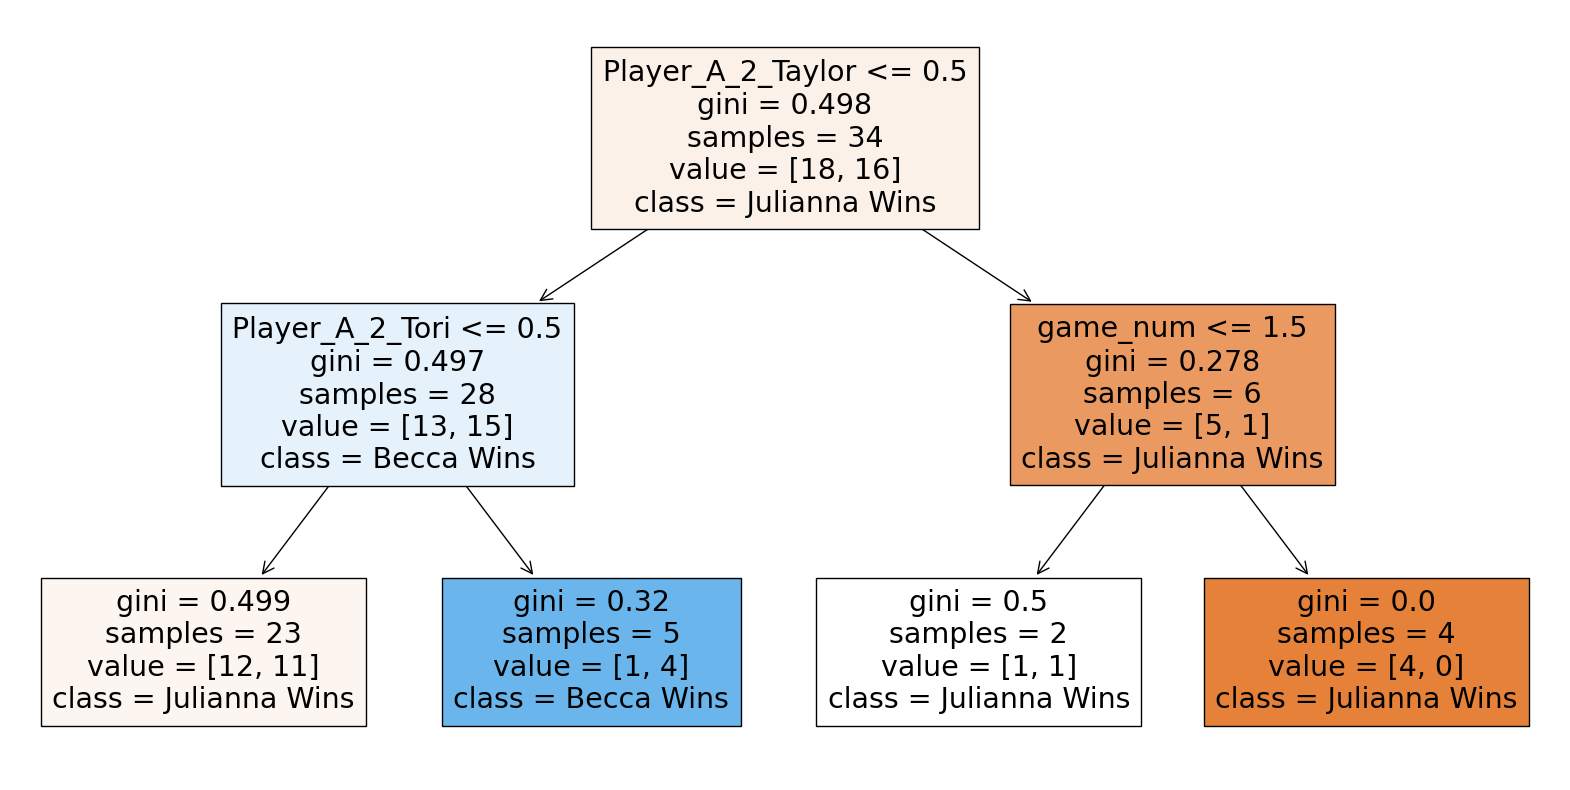

In [23]:
# Visualize a single decision tree from the forest
plt.figure(figsize = (20, 10))
plot_tree(best_rf.estimators_[14], feature_names = features,
          class_names = ['Julianna Wins','Becca Wins'], 
          filled = True)
plt.show()

In [ ]:
for i in range(8):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
#                                max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [24]:
import joblib

# Save the best model to a file
joblib.dump(best_rf, 'models/rf.joblib')

['models/rf.joblib']